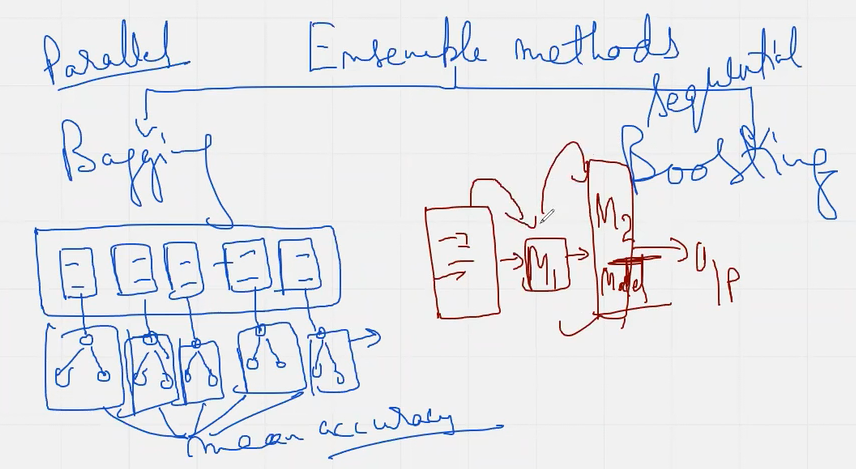

# Ensemble Methods- Final

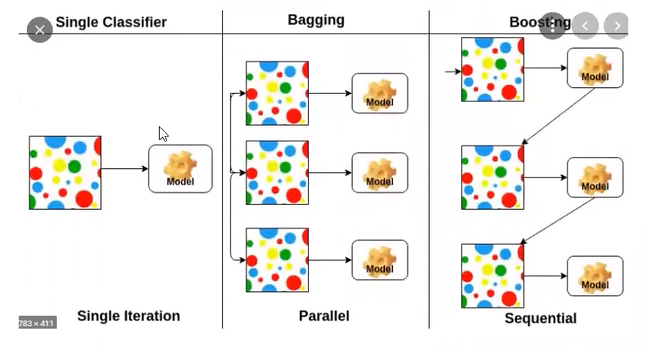

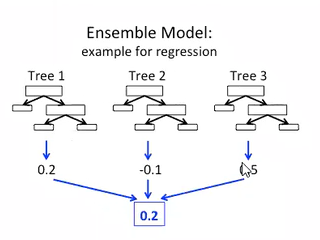

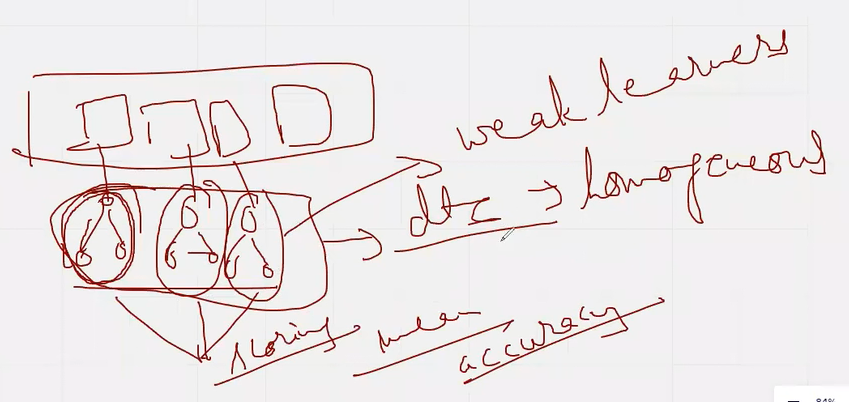

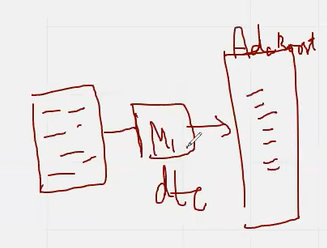

In [1]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris=load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
x=iris.data[:,:4]
y=iris.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

# Bagging

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42) #considering DecisionTree as weak learner by default.
#RandomForestClassifier(),n_estimators=100 ----->Default
#The dataset is being divided into 100 subsets and DecisionTreeClassifier is being applied on them separately.
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Boosting

In [6]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,learning_rate=1.0)------>Default
#learning_rate is a tuning parameter.
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
#Import support vector classifier
from sklearn.svm import SVC
svc=SVC()

#Create AdaBoostClassifier object
ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')#Here SupportVectorClassifier is the weak learner.
ad.fit(x_train,y_train)

ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.3
[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.00      0.46         9
           2       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30



In [9]:
#Import support vector classifier
from sklearn.svm import SVC
svc=SVC(kernel='linear')

#Create AdaBoostClassifier object
ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)

ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9666666666666667
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Voting Classifier

In [11]:
from sklearn.ensemble import VotingClassifier


In [12]:
estimator=[]
estimator.append(('LR',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

In [13]:
estimator

[('LR', KNeighborsClassifier()),
 ('SVC', SVC(gamma='auto', probability=True)),
 ('DTC', DecisionTreeClassifier())]

In [14]:
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(x_train,y_train)
y_pred=vot_hard.predict(x_test)
print(y_pred)
score=accuracy_score(y_test,y_pred)
print("Hard voting score:",score)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Hard voting score: 1.0


In [15]:
vot_soft=VotingClassifier(estimators=estimator,voting='soft')
vot_soft.fit(x_train,y_train)
y_pred=vot_soft.predict(x_test)
print(y_pred)
score=accuracy_score(y_test,y_pred)
print("Soft voting score:",score)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Soft voting score: 1.0
